# Pytorch - I familiarise with Pytorch to learn the skills required to build the netowrks

A tensor is a number, vector, matrix or any n-d array

In [ ]:
import torch 

In [35]:
device = "cuda" if torch.cuda.is_available() else "cpu"

my_tensor = torch.tensor([[1,2,3],[4,5,6]],dtype = torch.float32,
                        device = device,requires_grad = True)
print(my_tensor)
print(my_tensor.shape)

x = torch.empty(size = (3,3))
x = torch.zeros(())
x = torch.rand((3,3))
x = torch.ones((3,3))
x = torch.eye((3))
x = torch.arange(0,5,1)
x = torch.linspace(0,5,6)
x = torch.empty(size=(1,5)).normal_(mean=0,std=1)
x = torch.empty(size =(1,5)).uniform_(0,1)
x = torch.diag(torch.ones(3))
x

tensor([[1., 2., 3.],
        [4., 5., 6.]], device='cuda:0', requires_grad=True)
torch.Size([2, 3])


tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [41]:
# initialize and convert tensors to other types (int, float, double)
tensor = torch.arange(4)
print(tensor.bool())
print(tensor.short())
print(tensor.long())
print(tensor.half())  # I dont have such a GPU so its not posible to use this 
print(tensor.float())  # Super used 
print(tensor.double())


tensor([False,  True,  True,  True])
tensor([0, 1, 2, 3], dtype=torch.int16)
tensor([0, 1, 2, 3])
tensor([0., 1., 2., 3.], dtype=torch.float16)
tensor([0., 1., 2., 3.])
tensor([0., 1., 2., 3.], dtype=torch.float64)


In [45]:
# Array to tensor conversion and vice versa 
import numpy as np 
np_array = np.zeros((5,5))
tensor = torch.from_numpy(np_array)
print(tensor)
np_array = tensor.numpy()
print(np_array)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]], dtype=torch.float64)
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [60]:
# Tensor math and comparison operations 
x = torch.tensor([1,2,3])
y = torch.tensor([7,8,9])
z1 = torch.empty(3)
torch.add(x,y,out=z1)
z3 = torch.add(x,y)
print(z1)
z2 = x+y
print(z2)
print(z3)

# division 
z = torch.true_divide(x,y)  # This is element wise division

# Any operation with underscore is done IN PLACE!

t = torch.zeros(3)
t.add_(x)
print(t)
t += x 
print(t)

# Exponentiation 
z = x.pow(2)
z= x**2 

# comparison 
z = x==0
print(z)



tensor([ 8., 10., 12.])
tensor([ 8, 10, 12])
tensor([ 8, 10, 12])
tensor([1., 2., 3.])
tensor([2., 4., 6.])
tensor([False, False, False])


In [66]:

# matrix multiplication 
x1 = torch.rand((2,5))
x2 = torch.rand((5,3))
x3 = torch.mm(x1,x2)
print(x3)
x3 = x1.mm(x2)
print(x3)
x1 = torch.rand((1,3))
x2 = torch.rand((1,3))
x3 = torch.mm(x1.T,x2)
print(x3)

tensor([[0.8896, 1.1292, 1.3298],
        [1.1706, 1.5681, 1.5771]])
tensor([[0.8896, 1.1292, 1.3298],
        [1.1706, 1.5681, 1.5771]])
tensor([[0.2722, 0.2976, 0.1309],
        [0.6837, 0.7476, 0.3288],
        [0.7154, 0.7822, 0.3440]])


In [71]:
# Matrix exponentiation 
matrix_exp = torch.rand(5,5)
print(matrix_exp.matrix_power(3)) # matrix multiplication by itself a few times

tensor([[5.0162, 5.0553, 2.5448, 3.7527, 5.3403],
        [5.6035, 5.5995, 2.6677, 4.0188, 5.9529],
        [4.1743, 4.2291, 2.0880, 3.0697, 4.4278],
        [5.8484, 5.8907, 2.8990, 4.2977, 6.2142],
        [5.3669, 5.6551, 3.1726, 4.3755, 5.6893]])


In [73]:
# elementwise multiplication 
x = torch.rand(3)
y = torch.rand(3)
z = x*y 
z

tensor([0.0446, 0.6909, 0.3626])

In [74]:
# dot product 
z = torch.dot(x,y)
z

tensor(1.0982)

In [77]:
# match matrix multiplication 
batch = 32
n = 10 
m = 20 
p = 30 

tensor1 = torch.rand((batch,n,m))
tensor2 = torch.rand((batch,m,p))
out_bmm = torch.bmm(tensor1, tensor2) # (batch, n,p)

In [85]:
# Example of broadcasting 
x1 = torch.rand((5,5))
x2 = torch.rand((1,5))   # This will be expanded to match the shape of x1 
z = x1 - x2
print(z)

z = x1**x2 # elementwise power
print(z)

tensor([[-0.0684, -0.0601,  0.2423, -0.0154, -0.5769],
        [-0.3708, -0.7928, -0.7123, -0.5806, -0.5480],
        [-0.7302, -0.1437,  0.0606, -0.3663, -0.1901],
        [-0.7819, -0.5372, -0.2434,  0.0524, -0.7538],
        [-0.5705, -0.3558,  0.1575, -0.2604, -0.0439]])
tensor([[0.8931, 0.8651, 0.9904, 0.7470, 0.3373],
        [0.5998, 0.1448, 0.0782, 0.1842, 0.3668],
        [0.2417, 0.7874, 0.8512, 0.4440, 0.7080],
        [0.1887, 0.4095, 0.5981, 0.7979, 0.1446],
        [0.4026, 0.5865, 0.9264, 0.5445, 0.8391]])


In [116]:
# Other tensor operations
x = torch.rand(3,5)
sum_x = torch.sum(x,dim=1)
print(sum_x)
values, indices = torch.max(x,dim=0)
print(values)
print(indices)
z = torch.argmax(x,dim =1)
print(z)
z = torch.mean(x.float())
print(z)
sorted_y, indices = torch.sort(x,dim =0,descending =False)
print(sorted_y)
z = torch.clamp(x,min=0.8)
print(z)
x = torch.tensor([1,0,1,1,1],dtype = torch.bool)
z = torch.any(x)
print(z)

tensor([2.1077, 3.1104, 2.2867])
tensor([0.8493, 0.7476, 0.8170, 0.4640, 0.9809])
tensor([0, 2, 1, 0, 1])
tensor([0, 4, 4])
tensor(0.5003)
tensor([[0.0900, 0.1898, 0.1582, 0.3424, 0.3756],
        [0.6980, 0.2601, 0.1587, 0.4248, 0.9485],
        [0.8493, 0.7476, 0.8170, 0.4640, 0.9809]])
tensor([[0.8493, 0.8000, 0.8000, 0.8000, 0.8000],
        [0.8000, 0.8000, 0.8170, 0.8000, 0.9809],
        [0.8000, 0.8000, 0.8000, 0.8000, 0.9485]])
tensor(True)


In [131]:
## Tensor indexing 
batch_size = 10 
features = 25 
x=torch.rand((batch_size,features))
print(x[0].shape)

x = torch.arange(3,16)
print(x[(x<2) & (x>8)])
print(x[x.remainder(2)==0])
print(torch.where(x>5))

y = torch.rand(3,4,5)
print(y.ndimension())
print(y.unique())
print(y.unique().shape)

torch.Size([25])
tensor([], dtype=torch.int64)
tensor([ 4,  6,  8, 10, 12, 14])
(tensor([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),)
3
tensor([0.0026, 0.0056, 0.0114, 0.0142, 0.0223, 0.0274, 0.0432, 0.0553, 0.0681,
        0.1172, 0.1242, 0.1502, 0.1643, 0.1693, 0.2334, 0.2444, 0.2539, 0.2869,
        0.2932, 0.2939, 0.3152, 0.3471, 0.3814, 0.3889, 0.4149, 0.4276, 0.4502,
        0.4852, 0.4918, 0.4992, 0.5042, 0.5078, 0.5399, 0.5444, 0.5470, 0.5478,
        0.5829, 0.5848, 0.6143, 0.6389, 0.7001, 0.7096, 0.7144, 0.7321, 0.7548,
        0.7687, 0.7753, 0.7844, 0.8216, 0.8401, 0.8430, 0.8431, 0.8676, 0.8770,
        0.8852, 0.9510, 0.9657, 0.9675, 0.9897, 0.9966])
torch.Size([60])


In [134]:
# tensor reshaping 

x = torch.arange(9)
x33 = x.view(3,3)   # Acts on continuous tensors. Tensors which are stored in continuous blocks in memory.
print(x33)
x33 = x.reshape(3,3)
print(x33.T)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
tensor([[0, 3, 6],
        [1, 4, 7],
        [2, 5, 8]])


In [137]:
x1 = torch.rand(2,5)
x2 = torch.rand(2,5)
print(torch.cat((x1,x2),dim=0).shape)
print(torch.cat((x1,x2),dim=1).shape)

torch.Size([4, 5])
torch.Size([2, 10])


In [145]:
batch = 64
x = torch.rand((batch,2,5,6))
z = x.view(batch,-1)
print(z.shape)
z = x.permute(0,3,1,2)
print(z.shape)

torch.Size([64, 60])
torch.Size([64, 6, 2, 5])


In [153]:
x = torch.arange(10)
print(x.unsqueeze(1).unsqueeze(0).shape)
print(x.unsqueeze(1).squeeze(1))

torch.Size([1, 10, 1])
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


## Derivatives 

What makes Pytorch really nice is its ability to process derivatives with respect to the tensors that ahve requires_grad set to true.

In [173]:
x = torch.arange(10,dtype=torch.float)/2
w = torch.arange(10,dtype=torch.float,requires_grad= True)/3
b = torch.rand(1, requires_grad= True)
l = torch.rand(10)

y = w.dot(x)*l.dot(l) + b
print(y)


tensor([275.0395], grad_fn=<AddBackward0>)


In [174]:
y.backward() # This computes the derivatives! 



In [175]:
print("dy/dx:", x.grad)
print("dy/dw:", w.grad)
print("dy/db:", b.grad)


dy/dx: None
dy/dw: None
dy/db: tensor([1.])


c:\users\andy cai\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  


## Linear regression 


In [181]:
inputs = np.array([[73,67,43],
                   [91,88,64],
                   [87,134,58],
                   [102,43,37],
                   [69,96,70]],dtype = 'float32')
targets = np.array([[56,70],
                  [81,101],
                    [119,133],
                    [22,37],
                    [103,119]],dtype = 'float32')
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [182]:

w = torch.randn(2,3,requires_grad=True)
b = torch.randn(2,requires_grad=True)


In [185]:
def model(x):
    return x @ w.T + b


def mse(preds, targets):
    diff = targets - preds
    return torch.sum(diff*diff)/diff.numel()
# This is the prediction from the model in the untrained state! 

tensor([[161.7383,  -6.7699],
        [215.1136,  -4.4106],
        [214.4779,  15.9850],
        [184.9184, -36.0167],
        [196.6936,  13.8238]], grad_fn=<AddBackward0>)


In [187]:
preds = model(inputs)
print(preds)
loss = mse(preds,targets)
print(loss)

tensor([[161.7383,  -6.7699],
        [215.1136,  -4.4106],
        [214.4779,  15.9850],
        [184.9184, -36.0167],
        [196.6936,  13.8238]], grad_fn=<AddBackward0>)
tensor(12069.4941, grad_fn=<DivBackward0>)


## Compute gradients
we can automatically compute the gradient of the loss with all the different tensors! 



In [188]:
loss.backward()  #computes it !

In [190]:
print(w.grad)
print(b.grad)

tensor([[10262.4697,  9536.1152,  6250.8540],
        [-8016.3452, -8667.2715, -5379.6401]])
tensor([118.3884, -95.4777])


In [193]:
w.grad.zero_() # The reson for this is because pytorch accumulates gradients. The next time we call backwards the gradient is 
# added. 
b.grad.zero_()


tensor([0., 0.])

## Use gradient descent

The following steps are required: 
1. Generate predictions 
2. calculate the loss
3. compute the gradients wrt to the weights and biases
4. adjust weights by subtracting stepsize*gradient 
5. reset the gradients to 0 



In [201]:
preds = model(inputs)

loss = mse(preds,targets)

loss.backward()

In [202]:

with torch.no_grad(): 
    w-= w.grad* 1e-5
    b -= b.grad*1e-5
    w.grad.zero_()
    b.grad.zero_()

A few points to note: 
    * We use `torch.no_grad` to indicate that we dont track, calculate or modify gradients while updating the weights and biases. 
    * we are using a small update step.
    * set the gradient back to 0 so that future calculations are not affected. 

In [225]:
errors = []
w = torch.randn(2,3,requires_grad=True)
b = torch.randn(2,requires_grad=True)
for i in range(1000):
    preds = model(inputs)
    loss = mse(preds, targets)
    loss.backward()
    with torch.no_grad(): 
        w-= w.grad* 2e-5
        b -= b.grad*2e-5
        w.grad.zero_()
        b.grad.zero_()
    errors.append(float(loss.detach().numpy()))


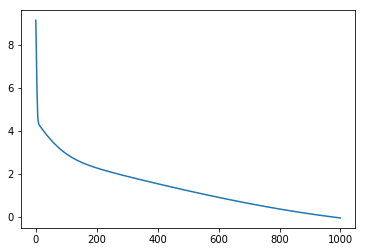

In [228]:
import matplotlib.pyplot as plt 
plt.plot(np.log(errors))

In [227]:
print(errors[-1])

0.9609705209732056


# Neural Network!

Often data has millions of rows, which we cant fit into memory. Matric multiplication is slow. O(N3). Good to work with smaller matrices. This is batch training! 


In [237]:
import torch.nn as nn
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], [91, 88, 64], [87, 134, 58], 
                   [102, 43, 37], [69, 96, 70], [73, 67, 43], 
                   [91, 88, 64], [87, 134, 58], [102, 43, 37], 
                   [69, 96, 70], [73, 67, 43], [91, 88, 64], 
                   [87, 134, 58], [102, 43, 37], [69, 96, 70]], 
                  dtype='float32')

# Targets (apples, oranges)
targets = np.array([[56, 70], [81, 101], [119, 133], 
                    [22, 37], [103, 119], [56, 70], 
                    [81, 101], [119, 133], [22, 37], 
                    [103, 119], [56, 70], [81, 101], 
                    [119, 133], [22, 37], [103, 119]], 
                   dtype='float32')
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

### Dataset and DataLoader 
A dataset allows access to rows from inputs and targets as tuples. 

In [238]:
from torch.utils.data import TensorDataset 
train_ds = TensorDataset(inputs,targets)
train_ds[[1,3,5,7]]

(tensor([[ 91.,  88.,  64.],
         [102.,  43.,  37.],
         [ 73.,  67.,  43.],
         [ 87., 134.,  58.]]), tensor([[ 81., 101.],
         [ 22.,  37.],
         [ 56.,  70.],
         [119., 133.]]))

In [240]:
from torch.utils.data import DataLoader
batch_size = 5 
train_dl = DataLoader(train_ds, batch_size,shuffle= True)

for xb, yb in train_dl:
    print("batch:")
 

batch:
batch:
batch:


### nn.linear 

This creates a model, initialises wweights and biases automatically.  define the model using `nn.linear` class

In [242]:
model = nn.Linear(3,2) #3 inputs, 2 outputs
print(model.weight)
print(model.bias)


Parameter containing:
tensor([[ 0.1083, -0.3360, -0.4275],
        [ 0.5521, -0.1228, -0.0344]], requires_grad=True)
Parameter containing:
tensor([ 0.0301, -0.1235], requires_grad=True)


In [245]:
preds = model(inputs)
#print(preds)

In [246]:
import torch.nn.functional as F 
# Define loss function: 
loss_fn = F.mse_loss

In [248]:
loss = loss_fn(preds, targets)
print(loss)
loss = mse(preds,targets)
print(loss)

tensor(10862.8242, grad_fn=<MseLossBackward>)
tensor(10862.8242, grad_fn=<DivBackward0>)


### Optimizer 
Instaed of manually manipulating the model's weights and biases using gradients, we can use the optimizer optim.SGD ` stochastic gradient descent` Samples are selected randomly in batches to perfor estimation of the objective function. 

In [250]:
# Define optimizer 
opt = torch.optim.SGD(model.parameters(),lr = 1e-5) # You can tell it what we are updating 

In [251]:
def fit(num_epochs, model, loss_fn, opt):
    # repeat for given number of epochs
    for epoch in range(num_epochs):
        
        # train with batches of data 
        for xb,yb in train_dl:
            # 1. generate predictions 
            preds = model(xb)
            
            # 2. Calculate the loss 
            loss = loss_fn(preds, yb)
            
            # 3. compute the gradients 
            loss.backward()
            
            # 4. Update parameters using gradients 
            opt.step()
            
            # 5. reset the gradient to 0 
            opt.zero_grad()
            
            
        #print progress 
        if (epoch+1) %10 ==0: 
            print("epoch %d / %d , loss = %.4f" %(epoch+1, num_epochs, loss))
            
            

In [254]:
fit(100,model, loss_fn, opt)

epoch 10 / 100 , loss = 3.6932
epoch 20 / 100 , loss = 14.6340
epoch 30 / 100 , loss = 12.7535
epoch 40 / 100 , loss = 8.8777
epoch 50 / 100 , loss = 15.6925
epoch 60 / 100 , loss = 10.8409
epoch 70 / 100 , loss = 16.7094
epoch 80 / 100 , loss = 5.6360
epoch 90 / 100 , loss = 17.3870
epoch 100 / 100 , loss = 11.9532
